In [21]:
import pandas as pd
from dateutil.parser import parse
from datetime import timedelta
import numpy as np

%matplotlib inline

# SOURCE : https://raw.githubusercontent.com/zelima/country-continents/master/data/country-continents.csv
country_continent = pd.read_csv('country-continents.csv')


# SOURCE: https://www.kaggle.com/tanuprabhu/population-by-country-2020?select=population_by_country_2020.csv
country_pop = pd.read_csv('population_by_country_2020.csv', na_values='N.A.').rename(columns={'Country (or dependency)': 'Country'})

added_info = pd.merge(country_pop, country_continent, on='Country')

# Loading Data & Preprocessing

In [2]:
confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

confirmed.rename(
    columns={'Country/Region': 'Country'},
    inplace=True
)

deaths.rename(
    columns={'Country/Region': 'Country'},
    inplace=True
)

recovered.rename(
    columns={'Country/Region': 'Country'},
    inplace=True
)


ini = parse('1/22/20'); end = parse('4/24/20'); delta = end - ini

dates = [ini + timedelta(days=i) for i in range(delta.days + 1)]
dates_str = [date.strftime('%-m/%-d/%y') for date in dates]

print('First Date:', ini)
print('Last Date: ', end)
print('No of days:', delta.days + 1, '\n')

print('Province/State no. of NaNs:')
print(confirmed['Province/State'].isna().sum(), deaths['Province/State'].isna().sum(), recovered['Province/State'].isna().sum())

# Adding extra info.

confirmed = pd.merge(confirmed, added_info, on='Country').drop(labels=['Province/State'], axis=1)
deaths    = pd.merge(deaths,    added_info, on='Country').drop(labels=['Province/State'], axis=1)
recovered = pd.merge(recovered, added_info, on='Country').drop(labels=['Province/State'], axis=1)

confirmed = confirmed[confirmed.columns.tolist()[-1:] + confirmed.columns.tolist()[:-1]]
deaths    = deaths[deaths.columns.tolist()[-1:]       + deaths.columns.tolist()[:-1]]
recovered = recovered[recovered.columns.tolist()[-1:] + recovered.columns.tolist()[:-1]]

First Date: 2020-01-22 00:00:00
Last Date:  2020-04-24 00:00:00
No of days: 94 

Province/State no. of NaNs:
182 182 183


# Choosing Countries by `Most Urban %` in Asia

In [3]:
most_urban = confirmed.dropna().sort_values(by='Urban Pop %', ascending=False)

In [4]:
most_urban[(most_urban['Continent'] == 'AS') & (most_urban['Country']
                                                != 'China')].sort_values(by='Population (2020)', ascending=False).head(10)

,Continent,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
128,AS,India,21.0000,78.0000,0,0,0,0,0,0,...,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28.0,35 %,17.70 %
129,AS,Indonesia,-0.7893,113.9213,0,0,0,0,0,0,...,272931713,1.07 %,2898047,151,1811570,-98955.0,2.3,30.0,56 %,3.51 %
173,AS,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,219992900,2.00 %,4327022,287,770880,-233379.0,3.6,23.0,35 %,2.83 %
20,AS,Bangladesh,23.6850,90.3563,0,0,0,0,0,0,...,164354176,1.01 %,1643222,1265,130170,-369501.0,2.1,28.0,39 %,2.11 %
136,AS,Japan,36.0000,138.0000,2,2,2,2,4,4,...,126552765,-0.30 %,-383840,347,364555,71560.0,1.4,48.0,92 %,1.62 %
178,AS,Philippines,13.0000,122.0000,0,0,0,0,0,0,...,109280343,1.35 %,1464463,368,298170,-67152.0,2.6,26.0,47 %,1.41 %
225,AS,Vietnam,16.0000,108.0000,0,2,2,2,2,2,...,97160127,0.91 %,876473,314,310070,-80000.0,2.1,32.0,38 %,1.25 %
207,AS,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,84153250,1.09 %,909452,110,769630,283922.0,2.1,32.0,76 %,1.08 %
130,AS,Iran,32.0000,53.0000,0,0,0,0,0,0,...,83771587,1.30 %,1079043,52,1628550,-55000.0,2.2,32.0,76 %,1.08 %
203,AS,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,69764925,0.25 %,174396,137,510890,19444.0,1.5,40.0,51 %,0.90 %


# Obtaining Time Series

In [5]:
# RUN ONCE!

similar_countries = ['Indonesia', 'Pakistan', 'Bangladesh', 'Philippines', 'Vietnam', 'Thailand', 'Iran']

selected_confirmed = confirmed[confirmed['Country'].isin(similar_countries)]
selected_deaths    = deaths[deaths['Country'].isin(similar_countries)]
selected_recovered = recovered[recovered['Country'].isin(similar_countries)]

info_cols = list(set(confirmed.columns) - set(dates_str))
ts_cols   = list(set(dates_str))

ts_confirmed = selected_confirmed[ts_cols + ['Country']].set_index('Country').T.sort_index()
ts_deaths    = selected_deaths[ts_cols + ['Country']].set_index('Country').T.sort_index()
ts_recovered = selected_recovered[ts_cols + ['Country']].set_index('Country').T.sort_index()

confirmed = selected_confirmed[info_cols].reset_index(drop='index')
deaths    = selected_deaths[info_cols].reset_index(drop='index')
recovered = selected_recovered[info_cols].reset_index(drop='index')

info_countries = confirmed

In [6]:
info_countries

,Long,World Share,Land Area (Km²),Lat,Med. Age,Fert. Rate,Urban Pop %,Continent,Density (P/Km²),Net Change,Country,Population (2020),Yearly Change,Migrants (net)
0,90.3563,2.11 %,130170,23.6850,28.0,2.1,39 %,AS,1265,1643222,Bangladesh,164354176,1.01 %,-369501.0
1,113.9213,3.51 %,1811570,-0.7893,30.0,2.3,56 %,AS,151,2898047,Indonesia,272931713,1.07 %,-98955.0
2,53.0000,1.08 %,1628550,32.0000,32.0,2.2,76 %,AS,52,1079043,Iran,83771587,1.30 %,-55000.0
3,69.3451,2.83 %,770880,30.3753,23.0,3.6,35 %,AS,287,4327022,Pakistan,219992900,2.00 %,-233379.0
4,122.0000,1.41 %,298170,13.0000,26.0,2.6,47 %,AS,368,1464463,Philippines,109280343,1.35 %,-67152.0
5,101.0000,0.90 %,510890,15.0000,40.0,1.5,51 %,AS,137,174396,Thailand,69764925,0.25 %,19444.0
6,108.0000,1.25 %,310070,16.0000,32.0,2.1,38 %,AS,314,876473,Vietnam,97160127,0.91 %,-80000.0


In [28]:
ts_confirmed[ts_confirmed >= 2]

Country,Bangladesh,Indonesia,Iran,Pakistan,Philippines,Thailand,Vietnam
1/22/20,NaN,NaN,NaN,NaN,NaN,2,NaN
1/23/20,NaN,NaN,NaN,NaN,NaN,3,2.0
1/24/20,NaN,NaN,NaN,NaN,NaN,5,2.0
1/25/20,NaN,NaN,NaN,NaN,NaN,7,2.0
1/26/20,NaN,NaN,NaN,NaN,NaN,8,2.0
...,...,...,...,...,...,...,...
4/5/20,88.0,2273.0,58226.0,3157.0,3246.0,2169,241.0
4/6/20,123.0,2491.0,60500.0,3766.0,3660.0,2220,245.0
4/7/20,164.0,2738.0,62589.0,4035.0,3764.0,2258,249.0
4/8/20,218.0,2956.0,64586.0,4263.0,3870.0,2369,251.0


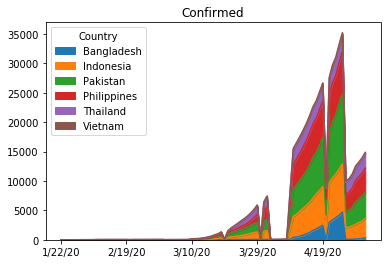

In [30]:
ts_confirmed[ts_confirmed >= 2].drop(labels='Iran', axis=1).plot(kind='area', title='Confirmed')
# ts_deaths.drop(labels='Iran', axis=1).plot(kind='area',    title='Deaths')
# ts_recovered.drop(labels='Iran', axis=1).plot(kind='area', title='Recovered');